<a href="https://colab.research.google.com/github/JonDScode/Fire_Detection/blob/Daniel/Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deteccion de incendios

In [1]:
%%capture

# Librería para mostrar la barra de progreso en la extracción del zip
!pip install tqdm

Instalamos algunas de las librerías que necesitaremos.

In [2]:
import os
from random import randint
import cv2                      # OpenCV
import numpy as np              # Numpy
import keras                    # Keras
from keras import layers
import matplotlib.pyplot as plt # Matplotlib

In [3]:
from tqdm import tqdm

In [4]:
from google.colab import files

In [5]:
%%capture
!pip install -q kaggle

Subimos la api de kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielrodrguezabal","key":"c3ef188bdfb36c8c12157385f677f089"}'}

Descargamos los ficheros de kaggle con sus correspondientes token

In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d kutaykutlu/forest-fire

forest-fire.zip: Skipping, found more recently modified local copy (use --force to force download)


Ahora pasamos a descomprimir los ficheros.

In [21]:
# Descomprimir el zip descargado

import zipfile

with zipfile.ZipFile("/content/forest-fire.zip", 'r') as zip:
  for member in tqdm(zip.infolist(), desc='Extrayendo '):
    try:
      zip.extract(member)
    except zipfile.error as e:
      pass

  print('Los dataset han sido descomprimidos correctamente 🎉')

# Borrar el zip para liberar ese espacio de almacenamiento

!rm forest-fire-images.zip


Extrayendo : 100%|██████████| 15765/15765 [00:39<00:00, 402.25it/s] 


Los dataset han sido descomprimidos correctamente 🎉
rm: cannot remove 'forest-fire-images.zip': No such file or directory


Como hicimos en el ejercicio, vamos diseñar una función que nos muestre las imágenes aleatoriamente.

In [10]:
def show_image():
  folders = ['/content/test_big', '/content/test_small']
  i = randint(0, 1)
  folder = folders[i]
  title = os.listdir(folder)[randint(0,len(os.listdir(folder)) -1)]
  file = folder + '/' + title

  fig, ax = plt.subplots(figsize=(7, 7))
  picture = cv2.imread(file)
  picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
  ax.imshow(picture)
  ax.axis('off')
  ax.set_title(folder + ' ' + title)

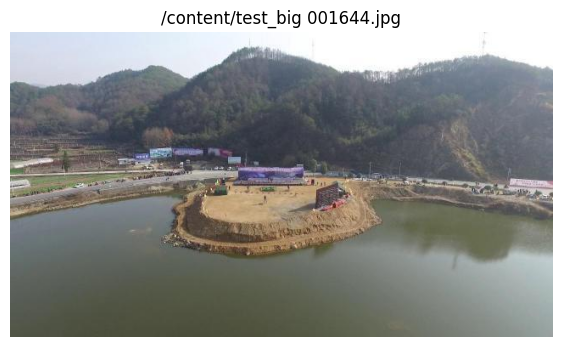

In [19]:
show_image()